In [36]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import pandas_datareader as pdr
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

In [37]:
# Establish start and end date for analysis
start = datetime.datetime(2021,9,12)
end = datetime.datetime(2022,9,12)

In [38]:
# Extract first stock with pandas datareader method
amrc = web.DataReader("AMRC", "yahoo", start,end)
amrc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,70.379997,67.699997,70.379997,68.230003,333900,68.230003
2021-09-14,70.800003,68.970001,69.010002,70.300003,399800,70.300003
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998
...,...,...,...,...,...,...
2022-09-06,67.290001,63.779999,64.809998,66.739998,185600,66.739998
2022-09-07,72.320000,65.860001,66.500000,72.160004,386000,72.160004
2022-09-08,74.669998,71.050003,71.379997,74.500000,375500,74.500000


In [39]:
# Extract second stock ith pandas datareader method
on = web.DataReader("ON", "yahoo", start,end)
on

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,47.750000,46.580002,47.330002,47.639999,5018200,47.639999
2021-09-14,48.459999,47.270000,48.049999,47.849998,5553200,47.849998
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999
...,...,...,...,...,...,...
2022-09-06,67.790001,65.029999,67.750000,66.050003,6896300,66.050003
2022-09-07,67.889999,65.639999,66.099998,67.360001,5836500,67.360001
2022-09-08,70.610001,66.389999,66.660004,70.550003,9769200,70.550003


In [40]:
# Extract third stock with pandas datareader method
stem = web.DataReader("STEM", "yahoo", start,end)
stem

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-13,23.340000,22.250000,22.540001,22.920000,2683900,22.920000
2021-09-14,23.080000,22.155001,22.950001,22.360001,2031600,22.360001
2021-09-15,22.459999,21.740000,22.250000,22.360001,2374000,22.360001
2021-09-16,23.885000,22.045000,22.299999,23.740000,2398100,23.740000
2021-09-17,25.980000,24.090000,24.309999,25.940001,8552600,25.940001
...,...,...,...,...,...,...
2022-09-06,14.486000,13.630000,14.390000,14.110000,2073400,14.110000
2022-09-07,15.650000,14.290000,14.340000,15.630000,7655100,15.630000
2022-09-08,16.280001,15.130000,15.310000,16.160000,5694800,16.160000


<AxesSubplot:xlabel='Date'>

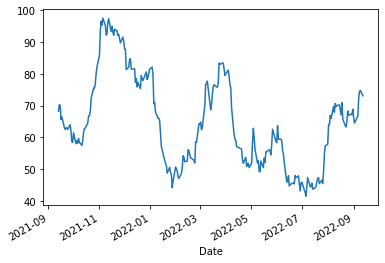

In [41]:
# test plotting feature on a stock dataframe
amrc['Close'].plot()

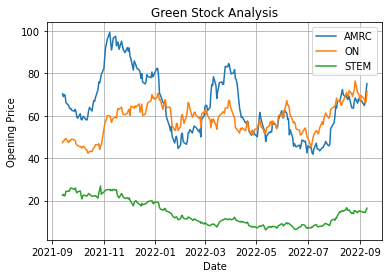

In [42]:
# Dataframe creation for each stock from csv format
amrc_df = pd.read_csv('AMRC.csv') 
on_df = pd.read_csv('ON.csv') 
stem_df= pd.read_csv('STEM.csv') 
 
# establish joint stock dataframe
stocks_df = pd.DataFrame()

# use date from amrc_df data to help establish joint df 'date' column
stocks_df['date'] = pd.to_datetime(amrc_df['Date'])

# create individual stock columns using data from 'Open' data only
stocks_df['AMRC'] = amrc_df['Open']
stocks_df['ON'] = on_df['Open']
stocks_df['STEM'] = stem_df['Open']

# plot open vs date
plt.plot(stocks_df['date'], stocks_df['AMRC'])
plt.plot(stocks_df['date'], stocks_df['ON'])
plt.plot(stocks_df['date'], stocks_df['STEM'])
 
# insert legends
plt.legend(labels=['AMRC','ON','STEM'])

# grid lines
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Green Stock Analysis')
plt.show() 

# one variable analysis (open), multiple categories (amrc, on, stem) - complex method
# also, plt.plot formatting with info inside parentheses (can't do figsize)

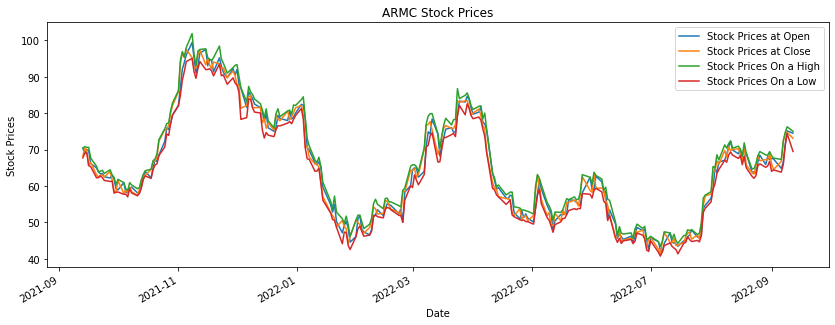

In [43]:
# compare open/close and high/low for AMRC (multi variable analysis)
amrc['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
amrc['Close'].plot(label= 'Stock Prices at Close')
amrc['High'].plot(label= 'Stock Prices On a High')
amrc['Low'].plot(label= 'Stock Prices On a Low')
# insert legend
plt.legend()

plt.title('ARMC Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

# multiple variables (open, close, high, low), one category (amrc)
# also, plot method with desired columns preceding 'plot' and labels inside.

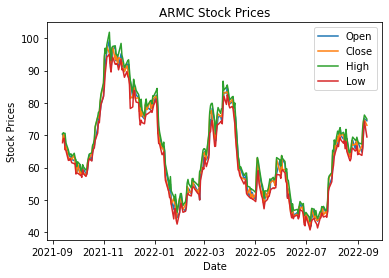

In [44]:
# secondary plotting method for amrc data. Shows prior method better b/c 'figsize' can be applied, whereas this does not allow
plt.plot(amrc['Open'])
plt.plot(amrc['Close'])
plt.plot(amrc['High'])
plt.plot(amrc['Low'])

# insert legend
plt.legend(labels=['Open','Close','High', 'Low'])

plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('ARMC Stock Prices')

plt.show()

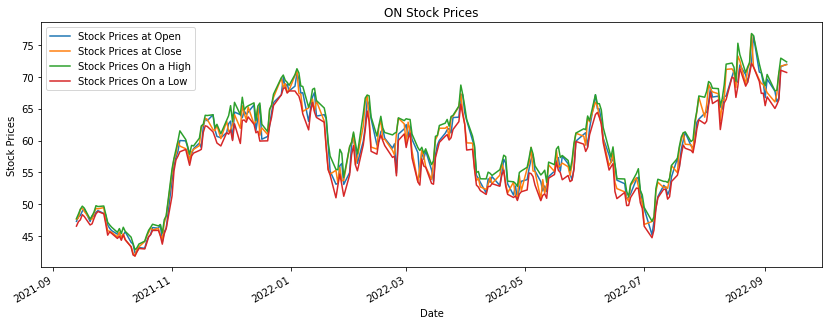

In [45]:
# compare open/close and high/low for ON (multi variable analysis)

on['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
on['Close'].plot(label= 'Stock Prices at Close')
on['High'].plot(label= 'Stock Prices On a High')
on['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('ON Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

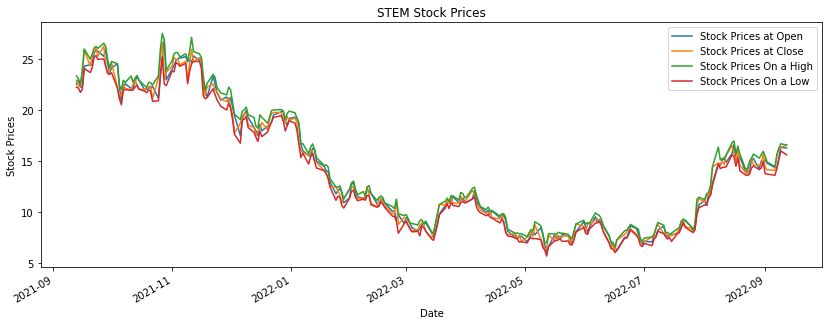

In [46]:
# compare open/close and high/low for STEM (multi variable analysis)

stem['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
stem['Close'].plot(label= 'Stock Prices at Close')
stem['High'].plot(label= 'Stock Prices On a High')
stem['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('STEM Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

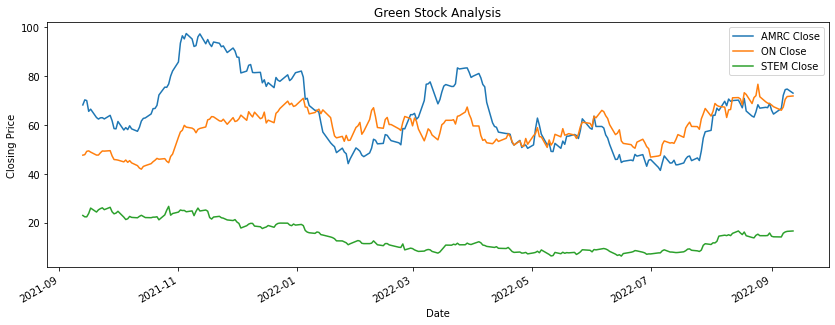

In [47]:
# one variable analysis (close), multiple categories (amrc, on, stem)
# also, column.plot formatting b/c info can be placed inside parentheses (e.g. figsize and labels)

amrc['Close'].plot(label= 'AMRC Close', figsize=(14,5))
on['Close'].plot(label= 'ON Close')
stem['Close'].plot(label= 'STEM Close')

# insert legend
plt.legend()

plt.title('Green Stock Analysis')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

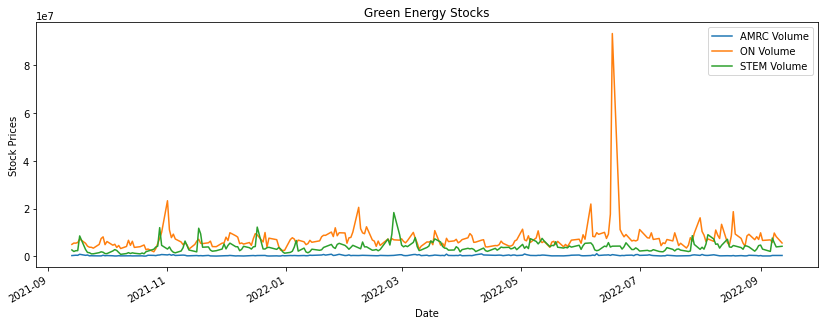

In [48]:
# Volume analysis for all three socks

amrc['Volume'].plot(label= 'AMRC Volume', figsize=(14,5))
on['Volume'].plot(label= 'ON Volume')
stem['Volume'].plot(label= 'STEM Volume')

# insert legend
plt.legend()

plt.title('Green Energy Stocks')
plt.ylabel('Stock Prices')
plt.xlabel('Date')
plt.show()

In [49]:
# if a stock with a high trading volume is rising, it means there is buying pressure, as investors demand pushes
# the stock to higher and higher prices. One the other hand, if the price of a stock with a high trading volume 
# is falling, it means more investors are selling their shares

In [50]:
# Multiplying opening price and each stocks' volume to get the total traded (money). This will be added as a column to each df
amrc['Total Traded'] = amrc['Open']*amrc['Volume']
on['Total Traded'] = on['Open']*amrc['Volume']
stem['Total Traded'] = stem['Open']*amrc['Volume']

In [51]:
# Test to see if a column is added to one of the stock's df table
stem.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2021-09-13,23.340000,22.250000,22.540001,22.920000,2683900,22.920000,7.526106e+06
2021-09-14,23.080000,22.155001,22.950001,22.360001,2031600,22.360001,9.175410e+06
2021-09-15,22.459999,21.740000,22.250000,22.360001,2374000,22.360001,1.060658e+07
2021-09-16,23.885000,22.045000,22.299999,23.740000,2398100,23.740000,9.798620e+06
2021-09-17,25.980000,24.090000,24.309999,25.940001,8552600,25.940001,2.110351e+07


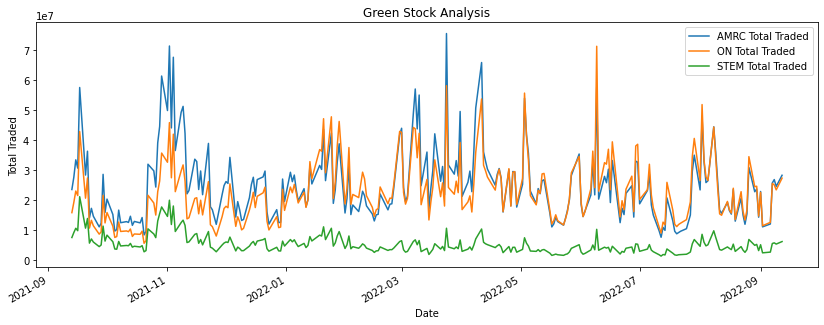

In [52]:
# Plot for total traded (money)

amrc['Total Traded'].plot(label='AMRC Total Traded', figsize =(14,5))
on['Total Traded'].plot(label='ON Total Traded')
stem['Total Traded'].plot(label='STEM Total Traded')

# insert legend
plt.legend()

plt.title('Green Stock Analysis')
plt.ylabel('Total Traded')
plt.xlabel('Date')
plt.show()

# time series graph shows that there is a large amt of TT for ON towards end of June 22; AMRC in 04/22; STEM in 11/21

In [53]:
# Argmax - domain of some function (TT = open x volume), at which the function values are maximized 
# AMRC argmax
amrc['Total Traded'].argmax()

134

In [54]:
# ON argmax
on['Total Traded'].argmax()

187

In [55]:
# STEM argmax
stem['Total Traded'].argmax()

4

In [56]:
# Use iloc to pinpoint table to just argmax data

amrc.iloc[[amrc['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2022-03-24,86.730003,79.25,79.480003,83.410004,948700,83.410004,7.540268e+07


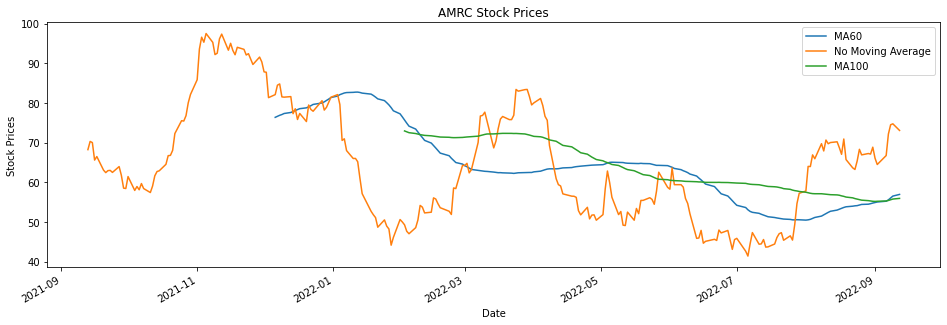

In [57]:
# Smooth out the date with moving average of 60 and 100 on AMRC stock (means)

# new column 'MA60' with formula following '='; plotting new column in graph
amrc['MA60'] = amrc['Close'].rolling(60).mean()
amrc['MA60'].plot(label='MA60')

# plotting AMRC 'Close' as 'No Moving Average'
amrc['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
amrc['MA100'] = amrc['Close'].rolling(100).mean()
amrc['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('AMRC Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

In [58]:
# Correlation and scatter matrix

In [59]:
# Create combined stock dataframe for scatter matrix on 'Open' data 
combined_df = pd.concat([amrc['Open'], on['Open'], stem['Open']], axis=1)
combined_df.head()

,Open,Open,Open
Date,,,
2021-09-13,70.379997,47.330002,22.540001
2021-09-14,69.010002,48.049999,22.950001
2021-09-15,70.000000,48.240002,22.250000
2021-09-16,69.680000,48.930000,22.299999
2021-09-17,66.169998,49.290001,24.309999


In [60]:
# Rename the columns
combined_df.columns = ['AMRC Open', 'ON Open', 'STEM Open']
combined_df.head()

,AMRC Open,ON Open,STEM Open
Date,,,
2021-09-13,70.379997,47.330002,22.540001
2021-09-14,69.010002,48.049999,22.950001
2021-09-15,70.000000,48.240002,22.250000
2021-09-16,69.680000,48.930000,22.299999
2021-09-17,66.169998,49.290001,24.309999


array([[<AxesSubplot:xlabel='AMRC Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='AMRC Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='ON Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='STEM Open'>]],
      dtype=object)

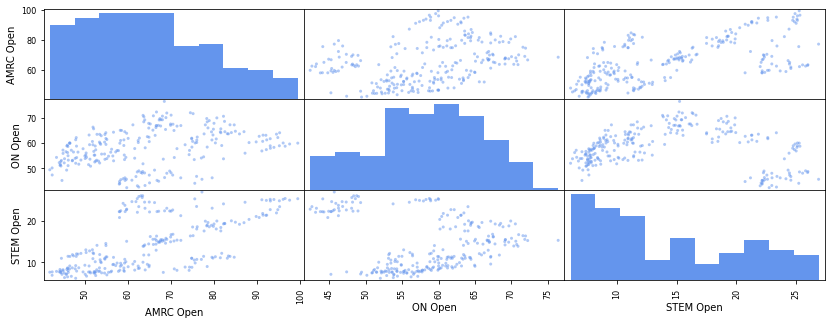

In [61]:
# plot the scatter matrix. These help to determine if there is a linear correlation with 1 or more variables

pd.plotting.scatter_matrix(combined_df, figsize=(14,5), color='cornflowerblue', hist_kwds={'color':['cornflowerblue']})

# can't assume relationship from this matrix as energy producers)

array([[<AxesSubplot:xlabel='AMRC Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='AMRC Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='ON Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='STEM Open'>]],
      dtype=object)

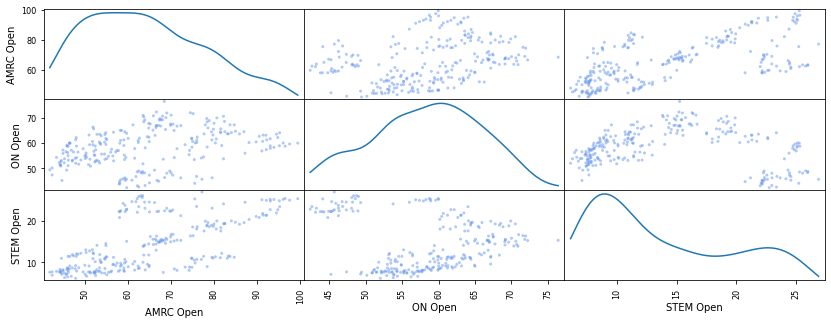

In [62]:
# Scatter Matrix on 'Open' Data with density plot integrated (KDE)

pd.plotting.scatter_matrix(combined_df, diagonal='kde', figsize=(14,5), color='cornflowerblue')

In [63]:
# Daily percentage change to measure volatility (distribution). DPC is the change in value of a 
# stock over a single trading day.

# rt = Pt/Pt-1 -1  (roi)

In [64]:
# Daily percentage change formula
amrc['Daily Percentage Change'] = (amrc['Close']/amrc['Close'].shift(1)) - 1
amrc.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA60,MA100,Daily Percentage Change
Date,,,,,,,,,,
2021-09-13,70.379997,67.699997,70.379997,68.230003,333900,68.230003,2.349988e+07,NaN,NaN,NaN
2021-09-14,70.800003,68.970001,69.010002,70.300003,399800,70.300003,2.759020e+07,NaN,NaN,0.030339
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002,3.336900e+07,NaN,NaN,-0.004125
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998,3.061739e+07,NaN,NaN,-0.062991
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998,5.744218e+07,NaN,NaN,0.013567


<AxesSubplot:>

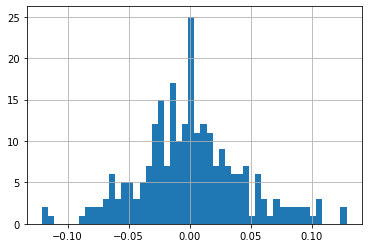

In [65]:
# Histogram to convert above table info into a more understandable format
# higher the std dev, the higher the variance is (more volatility)
# larger width = more variants

amrc['Daily Percentage Change'].hist(bins=50)

In [66]:
on['Daily Percentage Change'] = (on['Close']/on['Close'].shift(1)) - 1
on

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Daily Percentage Change
Date,,,,,,,,
2021-09-13,47.750000,46.580002,47.330002,47.639999,5018200,47.639999,1.580349e+07,NaN
2021-09-14,48.459999,47.270000,48.049999,47.849998,5553200,47.849998,1.921039e+07,0.004408
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999,2.299601e+07,0.028422
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002,2.149984e+07,0.003861
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999,4.278865e+07,-0.010324
...,...,...,...,...,...,...,...,...
2022-09-06,67.790001,65.029999,67.750000,66.050003,6896300,66.050003,1.257440e+07,-0.021626
2022-09-07,67.889999,65.639999,66.099998,67.360001,5836500,67.360001,2.551460e+07,0.019833
2022-09-08,70.610001,66.389999,66.660004,70.550003,9769200,70.550003,2.503083e+07,0.047358


In [67]:
stem['Daily Percentage Change'] = (stem['Close']/stem['Close'].shift(1)) - 1
stem

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Daily Percentage Change
Date,,,,,,,,
2021-09-13,23.340000,22.250000,22.540001,22.920000,2683900,22.920000,7.526106e+06,NaN
2021-09-14,23.080000,22.155001,22.950001,22.360001,2031600,22.360001,9.175410e+06,-0.024433
2021-09-15,22.459999,21.740000,22.250000,22.360001,2374000,22.360001,1.060658e+07,0.000000
2021-09-16,23.885000,22.045000,22.299999,23.740000,2398100,23.740000,9.798620e+06,0.061717
2021-09-17,25.980000,24.090000,24.309999,25.940001,8552600,25.940001,2.110351e+07,0.092671
...,...,...,...,...,...,...,...,...
2022-09-06,14.486000,13.630000,14.390000,14.110000,2073400,14.110000,2.670784e+06,-0.004234
2022-09-07,15.650000,14.290000,14.340000,15.630000,7655100,15.630000,5.535240e+06,0.107725
2022-09-08,16.280001,15.130000,15.310000,16.160000,5694800,16.160000,5.748905e+06,0.033909


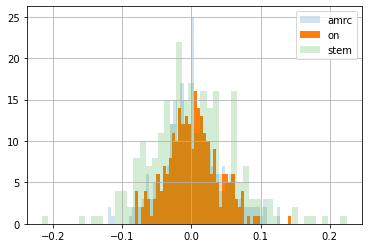

In [68]:
# combine these on same graph
amrc['Daily Percentage Change'].hist(bins=50, label='amrc', alpha=0.2)
on['Daily Percentage Change'].hist(bins=50, label='on')
stem['Daily Percentage Change'].hist(bins=50, label='stem', alpha=0.2)
plt.legend()

In [83]:
# Create table with all three stocks for daily percentaqe change only, integrating pct_change() and a for-loop. 
# Yfinance ia utilized to pull stocks directly by Ticker

stocks =['AMRC','ON','STEM']
stock_list = []
for stock in stocks:
    returns = yf.Ticker(stock)
    returns = returns.history(period="1y")
    returns['returns'] =  returns['Close'].pct_change()
    returns.rename(columns={'returns': stock}, inplace=True)
    returns = returns[stock]
    stock_list.append(returns)
    green_stock_returns =pd.DataFrame(stock_list).T
green_stock_returns

,AMRC,ON,STEM
Date,,,
2021-09-17,NaN,NaN,NaN
2021-09-20,-0.051436,-0.024954,-0.062452
2021-09-21,-0.009989,0.000210,0.037007
2021-09-22,0.008008,0.019295,0.019826
2021-09-23,0.000953,0.015638,0.012830
...,...,...,...
2022-09-12,-0.022344,0.003209,0.009756
2022-09-13,-0.010127,-0.069958,-0.012681
2022-09-14,0.055440,0.025422,0.065443


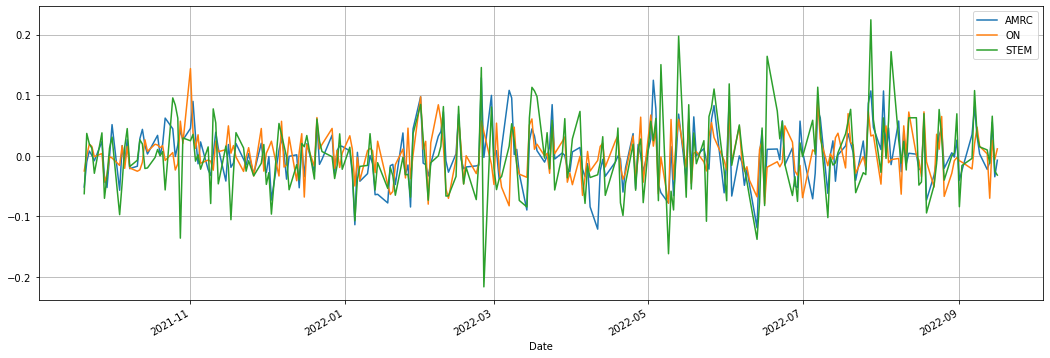

In [88]:
# Daily percentage change - line graph

green_stock_returns.plot(figsize=(18,6))
plt.grid(True)

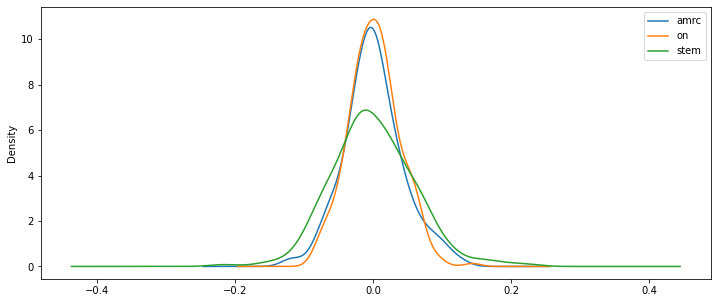

In [69]:
# Compare previous graph with a diagram down integrating KDE (kernel density estimate)
# KDE is normalized, histogram is not. Comparison of the two can be used for verification.

amrc['Daily Percentage Change'].plot(kind='kde', label='amrc', figsize=(12,5))
on['Daily Percentage Change'].plot(kind='kde', label='on')
stem['Daily Percentage Change'].plot(kind='kde',label='stem')
plt.legend()

<AxesSubplot:>

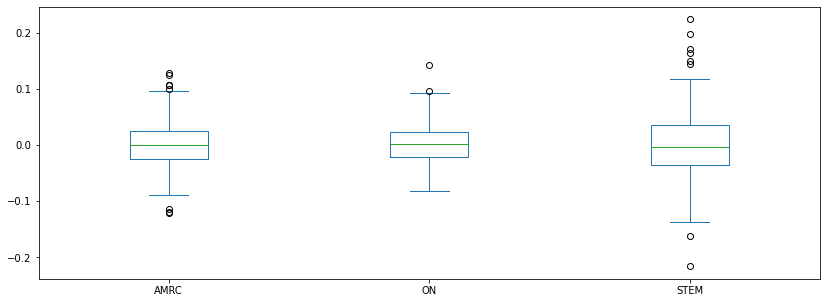

In [73]:
# Box Plot

boxplot_df = pd.concat([amrc['Daily Percentage Change'], on['Daily Percentage Change'], stem['Daily Percentage Change']], axis=1)
boxplot_df.columns = ['AMRC','ON','STEM']
boxplot_df.plot(kind='box', figsize=(14,5))

# stem is the most volatile

In [74]:
# Cumulative Return. Total change in the investment price over a set time.

# it = (1+rt)it-1

amrc['Cumulative Return'] = (1 + amrc['Daily Percentage Change']).cumprod() - 1 
amrc


,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA60,MA100,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,,
2021-09-13,70.379997,67.699997,70.379997,68.230003,333900,68.230003,2.349988e+07,NaN,NaN,NaN,NaN
2021-09-14,70.800003,68.970001,69.010002,70.300003,399800,70.300003,2.759020e+07,NaN,NaN,0.030339,0.030339
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002,3.336900e+07,NaN,NaN,-0.004125,0.026088
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998,3.061739e+07,NaN,NaN,-0.062991,-0.038546
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998,5.744218e+07,NaN,NaN,0.013567,-0.025502
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,67.290001,63.779999,64.809998,66.739998,185600,66.739998,1.202874e+07,55.231167,55.2875,0.035050,-0.021838
2022-09-07,72.320000,65.860001,66.500000,72.160004,386000,72.160004,2.566900e+07,55.566167,55.4184,0.081211,0.057599
2022-09-08,74.669998,71.050003,71.379997,74.500000,375500,74.500000,2.680319e+07,56.043334,55.5926,0.032428,0.091895


In [75]:
on['Cumulative Return'] = (1 + on['Daily Percentage Change']).cumprod() - 1 
on

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,
2021-09-13,47.750000,46.580002,47.330002,47.639999,5018200,47.639999,1.580349e+07,NaN,NaN
2021-09-14,48.459999,47.270000,48.049999,47.849998,5553200,47.849998,1.921039e+07,0.004408,0.004408
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999,2.299601e+07,0.028422,0.032955
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002,2.149984e+07,0.003861,0.036944
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999,4.278865e+07,-0.010324,0.026238
...,...,...,...,...,...,...,...,...,...
2022-09-06,67.790001,65.029999,67.750000,66.050003,6896300,66.050003,1.257440e+07,-0.021626,0.386440
2022-09-07,67.889999,65.639999,66.099998,67.360001,5836500,67.360001,2.551460e+07,0.019833,0.413938
2022-09-08,70.610001,66.389999,66.660004,70.550003,9769200,70.550003,2.503083e+07,0.047358,0.480898


In [76]:
stem['Cumulative Return'] = (1 + stem['Daily Percentage Change']).cumprod() - 1 
stem

,High,Low,Open,Close,Volume,Adj Close,Total Traded,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,
2021-09-13,23.340000,22.250000,22.540001,22.920000,2683900,22.920000,7.526106e+06,NaN,NaN
2021-09-14,23.080000,22.155001,22.950001,22.360001,2031600,22.360001,9.175410e+06,-0.024433,-0.024433
2021-09-15,22.459999,21.740000,22.250000,22.360001,2374000,22.360001,1.060658e+07,0.000000,-0.024433
2021-09-16,23.885000,22.045000,22.299999,23.740000,2398100,23.740000,9.798620e+06,0.061717,0.035777
2021-09-17,25.980000,24.090000,24.309999,25.940001,8552600,25.940001,2.110351e+07,0.092671,0.131763
...,...,...,...,...,...,...,...,...,...
2022-09-06,14.486000,13.630000,14.390000,14.110000,2073400,14.110000,2.670784e+06,-0.004234,-0.384380
2022-09-07,15.650000,14.290000,14.340000,15.630000,7655100,15.630000,5.535240e+06,0.107725,-0.318063
2022-09-08,16.280001,15.130000,15.310000,16.160000,5694800,16.160000,5.748905e+06,0.033909,-0.294939


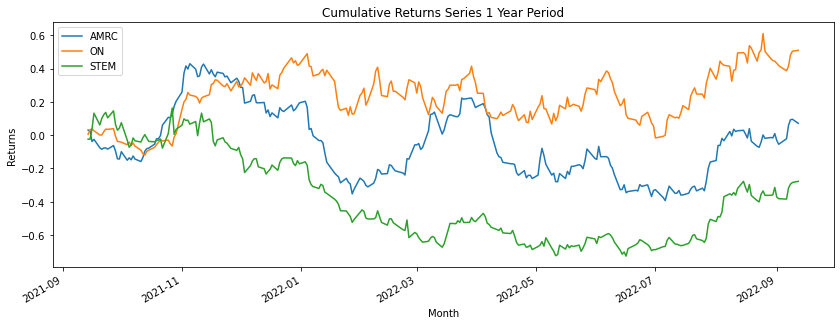

In [79]:
# Plot cumulative returns on all three stocks
amrc['Cumulative Return'].plot(label='AMRC', figsize=(14,5))
on['Cumulative Return'].plot(label='ON')
stem['Cumulative Return'].plot(label='STEM')
plt.title('Cumulative Returns Series 1 Year Period')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.legend()

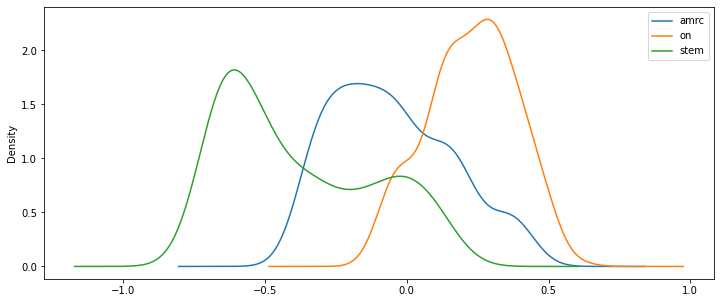

In [78]:
# KDE on cumulative returns

amrc['Cumulative Return'].plot(kind='kde', label='amrc', figsize=(12,5))
on['Cumulative Return'].plot(kind='kde', label='on')
stem['Cumulative Return'].plot(kind='kde',label='stem')
plt.legend()